In [1]:
from sympy import init_printing, symbols, sqrt, Add, eye, simplify
init_printing()

In [2]:
from kinematics import V3D, FV, SpinorU, SpinorV
from sympy import sin, cos, I, pi, acos
from sympy import Dummy
from sympy.physics.matrices import mgamma


## W decay into leptons

### kinematics

In [3]:
mW = symbols('m_W', positive=True)
E = symbols(r'E', positive=True)
th = V3D.th
phi = V3D.phi

In [4]:
px, py, pz = E*sin(th), 0, E*cos(th)
p3 = V3D(px, py, pz)
p4 = V3D(-px, py, -pz)


In [5]:
pmu1 = FV(mW, 0, 0, 0)
pmu3 = FV(E, p3.px, p3.py, p3.pz)
pmu4 = FV(E, p4.px, p4.py, p4.pz)

In [6]:
pmu3, pmu4

### Massive W at rest polarizations along the z axis

In [7]:
eps_minus = FV(0, 1/sqrt(2), -I/sqrt(2), 0)
eps_L = FV(0, 0, 0, 1) # W boson at rest
eps_plus = FV(0, -1/sqrt(2), -I/sqrt(2), 0)

In [8]:
def polarization(type):
    if type == 1:
        out = eps_plus
    elif type == -1:
        out = eps_minus
    elif type == 0:
        out = eps_L
    else:
        raise ValueError("type must be 1, -1 or 0")
    return out

In [9]:
ml, mnu = symbols(r'm_\ell, m_\nu', positive=True)
u3 = lambda s3:SpinorU(pmu3, ml, s3)
v4 = lambda s4:SpinorV(pmu4, mnu, s4)
I4x4 = eye(4)

In [10]:

positive_l_plus = Dummy(positive=True)
positive_l_minus = Dummy(positive=True)

positive_nu_plus = Dummy(positive=True)
positive_nu_minus = Dummy(positive=True)

In [22]:
helicities = [1, -1]

In [11]:
Jmu = lambda nu, s3, s4: (
    (u3(s3).adj()*mgamma(nu, lower=True)*v4(s4).matrixform())
    )[0].subs(acos(cos(th)), th).subs(acos(-cos(th)), th + pi).subs(
        {
            E + ml:positive_l_plus,
            E - ml: positive_l_minus
        }
        ).subs(
            {
                positive_l_plus: E + ml,
                positive_l_minus: E - ml
            }
        )
Jmu(0,1,1).simplify() #I4x4 - mgamma(5)

In [12]:
for mu in range(4):
    display(Jmu(mu,-1,1).subs(ml,0).subs(mnu,0).simplify())

In [13]:
gW = symbols('g_W', positive=True)
def M_polarization(pol_type, J):
    eps = polarization(pol_type).matrixform()
    factor = gW/sqrt(2)
    J0 = eps[0]*Jmu(0,-1,1)#.subs(ml,0).subs(mnu,0)
    J1 = eps[1]*Jmu(1,-1,1)#.subs(ml,0).subs(mnu,0)
    J2 = eps[2]*Jmu(2,-1,1)#.subs(ml,0).subs(mnu,0)
    J3 = eps[3]*Jmu(3,-1,1)#.subs(ml,0).subs(mnu,0)
    return factor*(J0 + J1 + J2 + J3)

In [14]:
high_energy_limit = {
                    ml:0, mnu:0
                }

In [15]:
M_plus = M_polarization(1,Jmu).subs(E, mW/2).simplify()
M_L = M_polarization(0,Jmu).subs(E, mW/2).simplify()
M_minus = M_polarization(-1,Jmu).subs(E, mW/2).simplify()

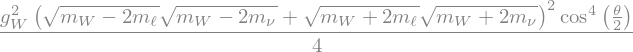

In [17]:
M_minus_square = M_minus.factor()**2
M_minus_square

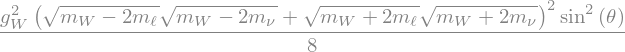

In [18]:
M_L_square = M_L.factor()**2
M_L_square


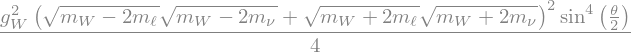

In [19]:
M_plus_square = M_plus.factor()**2
M_plus_square

In [20]:
from sympy import integrate

In [21]:
Ga_minus = integrate(
    M_minus_square.subs(E, mW/2)*sin(th), (th, 0, pi), (phi, 0, 2*pi))
Ga_L = integrate(
    M_L_square.subs(E, mW/2)*sin(th), (th, 0, pi), (phi, 0, 2*pi))
Ga_plus = integrate(
    M_plus_square.subs(E, mW/2)*sin(th), (th, 0, pi), (phi, 0, 2*pi))

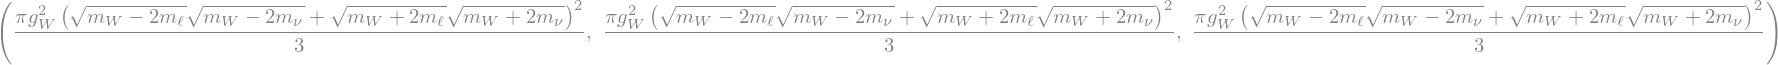

In [22]:
Ga_minus, Ga_L, Ga_plus

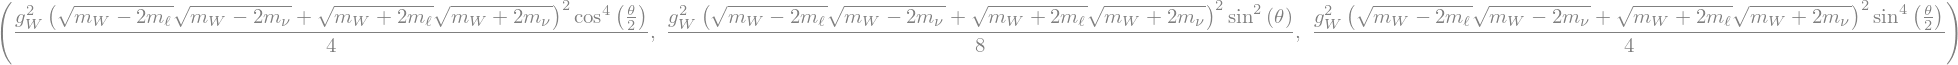

In [23]:
M_minus_square, M_L_square, M_plus_square

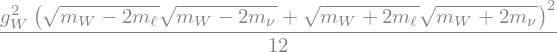

In [24]:
M_ave = ((M_L_square + M_plus_square + M_minus_square)/3).simplify()
M_ave

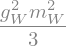

In [25]:
M_ave.subs(high_energy_limit)

In [26]:
mW_val = 80.377 # GeV
me_val = 0.000511 # GeV
mmu_val = 0.105 #GeV
mtau_val = 1.777 # GeV

In [27]:
M_ave.subs(mnu, 0).subs(
    {mW:mW_val, ml:me_val}
)

In [28]:
M_ave.subs(mnu, 0).subs(
    {mW:mW_val, ml:mmu_val}
)

In [29]:
M_ave.subs(mnu, 0).subs(
    {mW:mW_val, ml:mtau_val}
)

In [31]:
width_Wlnu = integrate(
    (M_ave*mW/2)/(32*pi**2*mW**2)*sin(th), (th, 0, pi), (phi, 0, 2*pi)
)

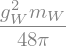

In [32]:
width_Wlnu.subs(high_energy_limit)